The goal of this notebook is to evaluate the embeddings that we have created. Specifically, we are interested in how well (both qualitative and quantitatively) our embeddings do at matching questions with context in the statement portion of the earnings call transcript. Since we divided the statements portion of each earnings call transcript into chunks of size at most 64 words, this reduces to matching each question with the statement chunk that is most "similar" in terms of some predefined similarity metric (e.g. cosine similarity).

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# Change this to point to your embeddings
FILE_PATH = 'embeddings/bag_of_words_test.pickle'

In [3]:
with open(FILE_PATH, 'rb') as f:
    transcript_embeddings = pickle.load(f)

In [4]:
def cosine_sim(u, v, sparse=False):
    if sparse:
        u = u.toarray().T
        v = v.toarray().T
    u = np.reshape(u, (u.shape[0],))
    v = np.reshape(v, (v.shape[0],))
    return np.dot(u.T, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [5]:
def jaccard_sim(u, v, sparse=False):
    if sparse:
        u = u.toarray().T
        v = v.toarray().T
    return np.sum(np.minimum(u, v)) / np.sum((u + v))

In [6]:
# Define this as you see fit
sim_func = cosine_sim

In [7]:
NUM_SAMPLES = len(transcript_embeddings)

In [8]:
q_to_chunk = []
scores = []
for i in range(NUM_SAMPLES):
    curr = {}
    for q_a_idx in range(len(transcript_embeddings[i][1])):
        if transcript_embeddings[i][1][q_a_idx][1] == 1: continue  # This is an answer
        q_embedding = transcript_embeddings[i][1][q_a_idx][0]
        
        curr_best_score, curr_best_chunk = None, None
        for chunk_idx in range(len(transcript_embeddings[i][0])):
            chunk_embedding = transcript_embeddings[i][0][chunk_idx]
            score = sim_func(q_embedding, chunk_embedding, sparse=True)
            
            if curr_best_score is None or score > curr_best_score:
                curr_best_score = score
                curr_best_chunk = chunk_idx
        scores.append(curr_best_score)
        curr[q_a_idx] = curr_best_chunk
    q_to_chunk.append(curr)

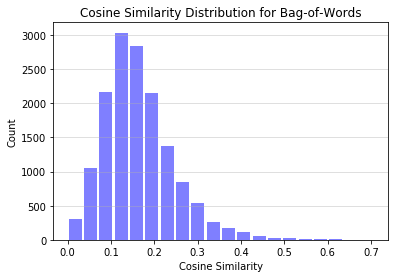

In [12]:
num_bins = 20
n, bins, patches = plt.hist(scores, num_bins, facecolor='blue', alpha=0.5, rwidth=0.85)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Cosine Similarity')
plt.ylabel('Count') # Adjust if using Jaccard Similarity
plt.title(r'Cosine Similarity Distribution for Bag-of-Words')
plt.show()

In [10]:
# Now we load the original transcripts (only using the training data for now)
with open('data/transcripts_test.pickle', 'rb') as f:
    transcripts = pickle.load(f)

In [11]:
for i, mapping in enumerate(q_to_chunk):
    print(len(mapping.keys()))
    for q_idx in mapping.keys():
        # Special case where an analyst is the last speaker in the Q&A session
        if q_idx == len(transcripts[i][3]) - 1: break
        print("START")
        print(q_idx)
        print ("QUESTION TEXT:\n")
        print(transcripts[i][3][q_idx][0])
        print("\nANSWER TEXT\n")
        print(transcripts[i][3][q_idx + 1][0])
        print("\nMODEL OUTPUT:\n")
        print(transcripts[i][2][mapping[q_idx]] + '\n')
        print('#' * 75)

24
START
0
QUESTION TEXT:

thank first question comes line vivien azer cowen hi good morning

ANSWER TEXT

good morning vivien

MODEL OUTPUT:

committed returning excess free cash shareholders time operator ready first question

###########################################################################
START
2
QUESTION TEXT:

bai certainly encouraging optimistic outlook 2017 kind circling back conversation november around acquisition informing distribution opportunity seeing pickup velocity particular perhaps super bowl advertising quite good

ANSWER TEXT

vivien marty good morning mean base business performing well still much distribution opportunity larry prepared remarks talked innovation may talked november bubble sparkling version base product everybody view really underrepresented market big push bubbles well new packaging bai black see beginning marketplace essence product traditional csd flavors saw slide sort interesting sort billboard dear soda welcome black really excited t

december 31st continue work complete sales 2017 believe track close joint venture 64 communities blackstone end first quarter also expect terminate leases 26 communities leased hcp throughout year intend continue actively pursue additional opportunities optimize portfolio move 2017 several smaller transactions process continue discussions leftovers additional lease restructuring let turn competitive environment focusing new supply labor market generally expected noted third quarter call experienced

###########################################################################
START
50
QUESTION TEXT:

okay thanks taking questions

ANSWER TEXT

thanks ryan thank ryan

MODEL OUTPUT:

thank andy thanks everyone taking time join us today comments organized four sections revise investor relations full year 2016 results highlights q4 2016 results 2017 outlook go comments 2016 like make comments new investor relations materials metrics focused first hope everyone chance visit new supplement inve

###########################################################################
START
44
QUESTION TEXT:

okay okay promise last one accounting think past factored factored amortization acquired intangibles adjusted eps believe sounds like going going forward okay give us sense maybe expecting level acquiring intangibles 2017 know legacy purchase accounting flow 2017 well

ANSWER TEXT

yeah absolutely right terms going provide measures defined exactly principles line items attachments provided acquisition related activity costs intangible amortization inventory going adjustment going make know lumpy calendarization could vary depending level acquisitions year probably around 20 million related next year going higher inventory amortization intangibles together

MODEL OUTPUT:

increased meaningfully 2015 first time part business growing since 2009 improvements seeing working capital help improve cash flow enables acquisitions organic investments growth increased dividend announced today guida

see positive indicators three primary aggregates end users expect growth 2017 aggregates product line infrastructure shipments expected increase digits volumes expected increase low digits residential shipments expected increase mid digits shipments expected flat overall expect aggregates product line shipments increase 4 aggregates product line pricing expected increase 5 7 also see strong 2017 cement business fact portland cement association forecasts positive demand growth texas

###########################################################################
START
68
QUESTION TEXT:

question guys think inventories ground whether product class location thinking ability manufacturing perspective production perspective kind deliver lot larger projects guys underway

ANSWER TEXT

would say going problem delivering base people mean probably safest way think think back downturn stanley much happening maintenance repair works seeing clean stone go seeing base project going dealing new projects

nick think noting right things tailorx low risk low recurrence score data available going low digits really change game ended delivering high single digit growth across full year think new data significance still deliver kind growth saw 3 5 range saw delivered fourth quarter tests 4 fourth quarter tough competitor back tailorx level data late continuing growth front us without new data think ajcc another bit data could give us even another boost early tell much might stay tuned

MODEL OUTPUT:

deliver 11 revenue growth following assumptions low digit growth oncology prostate test growth 30 revenue including cms intermediate coverage first half contributing approximately 40 revenue growth continued growth international tests revenue expect revenue growth accelerate latter half year due anticipated reimbursement progress prostate international breast markets notice providing tests delivered guidance 2017 reason change revenue become relevant business metric launch new tests reimbursement


MODEL OUTPUT:

research consortium arc continue dialogue regulators topic recently december 2016 arc reported submission draft guidance fda developing new therapies al amyloidosis amongst topics guidance reiterated al amyloidosis research community assessment evidence segregate end point clinical outcome survival turning vital amyloidosis study also continuing enroll study phase iii global registration randomized study enrolling patients al amyloidosis cardiac dysfunction expect fully enroll study approximately 230 patients

###########################################################################
START
8
QUESTION TEXT:

okay perfect quick prx003 want understand bit kind longer term goals program encouraging see kind acceleration data psoriasis side going psoriatic arthritis want understand thinking say beyond psoriatic arthritis given mechanism could applicable kind pretty wide range indications think kind longer picture goals program want keep like d001 view something similar prx0


thank next question alex barron housing research center please go ahead congratulations gentlemen good job

ANSWER TEXT

thanks alex

MODEL OUTPUT:

stable absorption pace job market remained strong driving steady traffic gap monthly homeownership rental cost narrowed producing good homebuilding conditions newest market charlotte top 10 homebuilding market one carefully studying several years charlotte favorable homebuilding environment steady population inflect driving demand relatively tight housing supply less three months supporting potential price growth job employment growth experienced healthy improvement past several years trend expected continue

###########################################################################
START
40
QUESTION TEXT:

wondering guys could comment sure missed guys could comment noticeable changes cancellation trends versus year ago

ANSWER TEXT

really seen anything significant obviously get fluctuation circumstances relating individual buyers trend

yeah talk exit nim obviously getting lot disclosure margins clearly put interest rate product improvement revenue hand talked also funding cost movement hard predict margins move back room take david ellis stand

MODEL OUTPUT:

result predicted would cost 100 hundred basis points fact fact provided cost 80 basis points however ongoing review going expect within calendar year probably see another 20 basis points portfolio period strong organic capital growth 112 basis points added cash profit see risk weighted assets drop 28 basis points entirely due interest rate risk banking book 28 basis points 15 basis points comes new

###########################################################################
42
START
0
QUESTION TEXT:

operator instructions first question comes line randy abrams credit suisse please ask question first question wanted ask change guidance original expectation grow first quarter could talk slowdown saw first quarter whether isolated applications maybe talk rebound se

larry first thing present way try keep simple want really understand peter marches team tune intrinsic value trying look even beyond loss ratio even beyond expense ratio looking profitability context way really run decisions inside commercial business simplistic presentation happens loss ratio say within attractive parts business want know making every day recognizing loss ratio might look attractive roe intrinsic value might classic example would one primary drivers behind grow part portfolio slide 21 declined size largely attributable property business loss ratio without natural catastrophes adjusted accident year loss ratio property may look attractive add acquisition costs add average annual loss expectation think capital consumption rest math behind scenes believe making even sophisticated see simple view page absolutely believe made right decisions every element product sets shown page extent shrunk accident year loss ratio deteriorated recognized tends sort attributable shifts b


ANSWER TEXT

hey harley take question terms sales cycles first mean sales team getting mature get mature learning better sell variety different sales cycle simply many different types merchants shopify plus keep mind many shopify plus merchants today upgrades obviously cases fairly quick sale cycle move plus cases working bigger companies whether nestle procter gambles world new sold direct consumer previously seem take little bit longer getting really good figuring every type plus merchant requires reduced net sales cycle

MODEL OUTPUT:

shopify plus first product investments year largely future proof shopify product investments platform data infrastructure much work 2017 make shopify platform even easier build partners giving developers internally externally better tools apis help keep shopify bleeding edge position data focus leveraging vast doors transaction data improvements also merchant success think new brand merchant shopify gets benefits data coming billions billions transac

okay appreciate clarity looking net debt go year ended expect change materially midyear thinking guess venator coming three times debt ebitda

ANSWER TEXT

would say would expect ratio ended year pretty similar go second quarter first quarter draw working capital modest increase terms leverage ratio seasonality inventory going comment yet terms size debt expect put venator think roughly line leverage ratio huntsman depending ltm ebitda venator time

MODEL OUTPUT:

remains stable ebitda margins improved primarily result lower raw material costs lower fixed cost business generates strong stable free cash flow generated cash ebitda ratio 2016 expect adjusted ebitda improve modestly business 2017 however expect slow start year business impacted higher cost inventory running p l first quarter moderate base liquid resin production event cause first quarter earnings similar fourth quarter turn slide number

###########################################################################
START
72
Q


ANSWER TEXT

well would certainly interest building natural gas adding natural gas fleet continue diversify portfolio complement wind also continue look wind whether would direct investment whether would ppas come basis rops respond back regulators recall rop elements wind aspects solar aspects things like respond regulators asked ace side course primarily focused wind moment see lots opportunities deal flow pipeline ace including one mdu representative example kind opportunities think us ace

MODEL OUTPUT:

clean energy excluding million goodwill impact guidance excludes impact possible acquisitions development projects anticipate effective rate approximately 20 2017 due federal production tax credits next would like talk briefly tax reform lower corporate tax rates interest deductibility expansion capital expenditures discussed among issues items could offsetting impact customer rates earnings remains difficult speculate ultimate impact get clarity final outcomes importantly signifi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




6
QUESTION TEXT:

wanted switch 7000 understand better fast forward r think spent billion billion r 2016 could separate c series versus 7000 spending number give us sense two program experience r going forward maybe know major remaining development milestones would maybe hurdles specifically 7000

ANSWER TEXT

yes spend side disclose global specifically today mean talk little bit expected 2017 look bba overall 700 million capex lot towards global 7000 program obviously came capex development spend across whole business around billion c series largely investments production ramp look c series recall 400 million cap ex spend 2016 looking forward say big spend obviously focused 7000 engineering resources completely focused said would use 1 billion cash overall roughly investor day month ago days ago stays true bit mix working capital well development starting ramp 7000 production units near middle end year get ready 2018 get deliveries going year

MODEL OUTPUT:

midpoint latest guidance 

36
QUESTION TEXT:

fort knox

ANSWER TEXT

hi tanya lauren comment briefly fort knox team really excellent work terms delineating potential extensions ore body become quite creative finding ways talk little bit tailings tailings facility think safe say would sustain maybe bit production seeing tr tr fort knox include anything east south wall work ongoing expiration

MODEL OUTPUT:

satellite deposits russia exploration drilling several mines particular kupol fort knox exciting year company advance organic pipeline continue build positive momentum portfolio mines generating solid consistent results number development projects balance sheet remains one best business kinross clear path forward excited future turn call tony

###########################################################################
START
38
QUESTION TEXT:

may high

ANSWER TEXT

good year

MODEL OUTPUT:

thank good morning us today paul rollinson chief executive officer tony giardini chief financial officer lauren roberts 

QUESTION TEXT:

okay let ask let somebody ask magellan let ask one question jump think foot laterals operational challenges going foot foot going nuance far operational side

ANSWER TEXT

interesting us bought acreage literally coming long time ago thought wanted make sure whatever lateral length appropriate able drill fair time thinking feet feet type lateral length keep mind early history feet acreage said release blocked operational acreage point view lot long laterals drill seen far really big issue drill additional feet feet feet fact little bit surprised david worked also would expect spent fair amount time trying make sure last feet produced barrels per foot ever wanted measure first feet pretty pleased way whole process worked operational know tended sign contracts pick rigs already went drill pipe years ago things needed selection rigs make sure operationally could actually get longer laterals done combination way gone buildup combination acreage allows us pleased results

MOD

START
46
QUESTION TEXT:

okay like terms much return shareholders guess longer term

ANSWER TEXT

yeah specific number 2017 remain firm commitment going return substantially 2020

MODEL OUTPUT:

larger customer base expect margins improve low single digits year 5 7 range closing 2016 outstanding year hiis ingalls newport news generated segment operating margin 9 third year row operating free cash flow strong sustained healthy backlog 5 billion new contracts looking ahead remain firmly committed path 2020 strategy invest billion capital strengthen protect core shipbuilding business return substantially free cash flow shareholders via

###########################################################################
START
48
QUESTION TEXT:

maybe missed say lincoln delivered going end 2016 think inaudible deliver

ANSWER TEXT

see programs first half year given teams working pretty hard get ships ready go sea

MODEL OUTPUT:

3 transition block refueling complex overall team preparing completio

european countries alone expect launching adynovate cuvitru hyqvia onivyde oncaspar well first time europe natpara branded natpar also expect expand xiidra launch first international market canada perhaps important 2017 launches could shp465 subject course regulatory approval could offer significant advance treatment adhd talk bit product potential minutes let move slide 12 many well aware key part rationale acquire baxalta belief inherent efficiencies could recognized

###########################################################################
START
2
QUESTION TEXT:

one question

ANSWER TEXT

okay quite clear jeff want say yes david give growth detail going provide today know maybe little disappointing reality working launch move away launch commercial access improves time related free coming day day current plan run program end second quarter would say second half year start probably seeing normalized also think david important take little bit step back launched market low growth dr

###########################################################################
START
26
QUESTION TEXT:

great thanks strategic one focus narrowed three key resource plays feel like sufficient scale obviously due get cagr mentioned see opportunities either expand positions swap positions add scale within three areas resource areas focused

ANSWER TEXT

well happy organic inventory feel confident ability across three basins deliver cagrs talked said brian always looking potential resource capture opportunities within three core basins think clearly display last year stack acquisition done smaller well one reasons want financial flexibility strong balance sheet participate market opportunities present terms delivery plan described cagr standpoint organic opportunities power

MODEL OUTPUT:

growth resource plays second quarter achieves oil boe growth 15 20 resource plays audio skip cash flow year 55 wti 2017 momentum positions us strongly future places us track 2017 2021 oil boe production ye

welcome riocan real estate investment trust fourth quarter 2016 conference call thursday february 16 2017 please go ahead

###########################################################################
START
20
QUESTION TEXT:

switching gears give us hbc joint venture know small updates

ANSWER TEXT

small exciting think anything material changed small context riocan going back thing redevelopment intensification three properties fantastic intensification redevelopment opportunities three stores montréal calgary vancouver obviously calgary probably going biggest rush right issues downtown calgary stories heart downtown store montréal heart downtown montréal flowering many parts kinds opportunities starting scratch surface vancouver store probably exciting adjacent actually connected pacific mall know pacific mall probably one top three retail properties country joint venture sitting think building kinds unused density transit hub next best one three best retail facilities canada think wor


###########################################################################
START
62
QUESTION TEXT:

fair enough helpful quick loyalty program specifically thinking timing joint kind program going forward tied credit card negotiations thinking otherwise

ANSWER TEXT

tied tied mean obviously got get technology work underway two separate technology platforms got work necessary order one platform possible could one platform two different program sitting top platform depending partners also got whole bunch questions around customer proposition programs somewhat different rules around qualification elite level around elite bonuses around things want work customers course got credit card timeshare companies issues relationship driven contractual driven going work certainly expect one program anytime 2017 whether 2018 something work maximize chances date give yet

MODEL OUTPUT:

remain owned leased line full year 2017 expect fee revenue total billion billion reflecting roughly 35 million 40

one things really encouraging seeing right particularly relative seeing say six nine months ago got active discussions ongoing mexico kurdistan kazakhstan russia even little discussions popenguine going pleased broad nature discussions supposed isolated single country single region

MODEL OUTPUT:

continued pricing pressure reduced volume international rentals revenue flat third quarter experienced lower surface tubular rentals offset increase well construction activity also fourth quarter able secure several new well construction contracts latin america markets begin generating revenue second quarter overall believe continue execute well difficult environment throughout 2016 remained focused disciplined cost control cash management maintaining strength business lines order benefit improving conditions proud

###########################################################################
START
6
QUESTION TEXT:

okay helpful guess one last could remind many barges guys project need maintain


continue experiment frac design still quoting current lateral meramec afes range million 12 million frac design largest cost variable total well cost closing ramp production q4 2016 great start 2017 stepped activity put together diversified 2017 drilling program focused oil projecting nice ramp production springboard us 2018 cost structure remains healthy strong overall program continues generate positive results excited turn call q

###########################################################################
START
52
QUESTION TEXT:

okay great 2017 culberson wolfcamp program much going focused upper versus lower clearly returns upper superior next couple years would anticipate mix changing

ANSWER TEXT

well john exact number breakdown tell yeah far right upper areas looking strong standpoint return also tell love like seen past lower flying ebony well tim tams coming taking frac design high expectations however fortunate position based drilling done date yeah going optionality kind g

QUESTION TEXT:

next question come travis miller morningstar please go ahead got one question one nuclear one start one electric customer usage growth guys hit next two years call 2017 2018 hit 9 earned roe guys targeting

ANSWER TEXT

yes specifically jimmy specifically 17 basically wash plan addition new customers well kind loss margin customers due efficiency working system specific target 18 generally level

MODEL OUTPUT:

50 foot tall 130 foot diameter weighs 2 million pounds one ring section placed containment vessel capping upper bowl slide 19 shows aerial view unit three nuclear island see ca01 one ca05 ca20 structural modules ca04 also placed visible picture slide 20 shows placement aforementioned unit three ca01 super module placed nuclear island december 2016 house steam generators pressurizer well form refueling canal inside

###########################################################################
START
4
QUESTION TEXT:

indiscernible net zero type growth

ANSWER TEXT

y

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



QUESTION TEXT:

150 net okay quarter corporate expenses guess little higher know accident cost maybe continue case also guess costs related cfi acquisition fairly material

ANSWER TEXT

yes quite important cameron settle situation accident took place 2011 really disastrous accident us cost million quarter affecting branch company really head office certain amount us head office take hit million really would call exceptional thing

MODEL OUTPUT:

every effort adjust supply demand well positioned capitalize return normal market condition particularly western region rebound oil prices positive impact notwithstanding initial positive signs anticipate significant short term improvement price volume focus cost control operating improvement resulted 40 increase operating income million truckload segment revenue fuel surcharge increased 24 cad458 million driven acquisition especially cfi excluding acquisition revenue declined 8 ongoing challenge faced specialized

#############################


###########################################################################
START
40
QUESTION TEXT:

got quick question capital plan guys notes guys commitments right placed yet incremental borrowing announced future

ANSWER TEXT

yes sorry yes incremental borrowing would announced future draw term loan fourth quarter fully swapped note future borrowings new borrowings

MODEL OUTPUT:

bill noted core ffo per share grew 5 fourth quarter grew 6 year continued focus demonstrating capital discipline combined attractive industrial fundamentals abundance accretive acquisition opportunities makes bright future company thank time morning continued support company turn back operator open floor questions thank

###########################################################################
START
42
QUESTION TEXT:

great thank operator instructions next question comes line michael mueller jpmorgan please proceed question hi great thanks apologize missed based guidance call 500 million net acquisitio

KeyboardInterrupt: 